In [125]:
import numpy as np
import mylib 
from scipy.integrate import odeint
mylib.sail_mass=0.01
mylib.alpha=0
mylib.sigp=1.25+1e-4

In [126]:
print(mylib.sail_mass)
print(mylib.alpha)
print(mylib.sigp)

0.01
0
1.2501


In [127]:
a1 = 1.0 / 4.0;
b1 = 3.0 / 32.0;
b2 = 9.0 / 32.0;
c1 = 1932.0 / 2197.0;
c2 = -7200.0 / 2197.0;
c3 = 7296.0 / 2197.0;
d1 = 439.0 / 216.0;
d2 = -8.0;
d3 = 3680.0 / 513.0;
d4 = -845.0 / 4104.0;
e1 = -8.0 / 27.0;
e2 = 2.0;
e3 = -3544.0 / 2565.0;
e4 = 1859.0 / 4104.0;
e5 = -11.0 / 40.0;
x1 = 25.0 / 216.0;
x2 = 0.0;
x3 = 1408.0 / 2565.0;
x4 = 2197.0 / 4104.0;
x5 = -1.0 / 5.0;
z1 = 16.0 / 135.0;
z2 = 0.0;
z3 = 6656.0 / 12825.0;
z4 = 28561.0 / 56430.0;
z5 = -9.0 / 50.0;
z6 = 2.0 / 55.0;

In [128]:
var0=[0.,0,0.,0.,0.,1.]

In [129]:
h=1e-1
errmax=1e-1
errmin=1e-2
var=var0
t=0
mytime=[]
myvar=[]
mylib.equation(var0,0)

array([   0.        ,    0.        ,    1.        ,    0.        ,
          0.        ,  758.76795413])

In [130]:
for ind in range(1000): 
    
    check=0
    vartmp=var
    diff=mylib.equation(vartmp,t)
    k1=h*diff
    vartmp = var + a1*k1

    diff=mylib.equation(vartmp,t)
    k2=h*diff
    vartmp = var + b1*k1 + b2*k2

    diff=mylib.equation(vartmp,t)
    k3=h*diff
    vartmp=var+c1*k1+c2*k2+c3*k3

    diff=mylib.equation(vartmp,t)
    k4=h*diff
    vartmp=var+d1*k1+d2*k2+d3*k3+d4*k4

    diff=mylib.equation(vartmp,t)
    k5=h*diff
    vartmp=var+e1*k1+e2*k2+e3*k3+e4*k4+e5*k5

    diff=mylib.equation(vartmp,t)
    k6=h*diff
    #print(vartmp)
    #print(diff)
    y  = var  + x1*k1  + x2*k2  + x3*k3  + x4*k4  + x5*k5 ;
    z  = var  + z1*k1  + z2*k2  + z3*k3  + z4*k4  + z5*k5  + z6*k6 ;
    #print(y)
    #print(z)
    for i in np.arange(6):
        if var[i]==0 and y[i]==0:
            err=errmin
        elif var[i]<1e3:
            err= np.abs(y[i]  - z [i])
        else:
            err= np.abs(y[i]  - z [i])/np.abs(y[i]) 
        print(err)
        if err>errmax:
            check=1
        elif err<errmin and check!=1:
            check=-1


    if check==1:
        h=h/2
    elif check==-1:
        t=t+h
        var=y
        h=h*2
        print([ind,t,var])
        mytime.append(t)
        myvar.append(var)
    else:
        t=t+h
        var=y
        print([ind,t,var])
        mytime.append(t)
        myvar.append(var)
    if var[5]>1e7:
        break


0.01
0.01
4.4408920985e-16
0.01
0.01
1.42108547152e-14
[0, 0.1, array([  0.        ,   0.        ,   3.89383977,   0.        ,
         0.        ,  76.87679541])]
0.01
0.01
0.0
0.01
0.01
2.84217094304e-14
[1, 0.30000000000000004, array([   0.        ,    0.        ,   34.44455794,    0.        ,
          0.        ,  228.63038624])]
0.01
0.01
0.0
0.01
0.01
0.0
[2, 0.7000000000000001, array([   0.        ,    0.        ,  186.59814876,    0.        ,
          0.        ,  532.13756789])]
0.01
0.01
2.27373675443e-13
0.01
0.01
0.0
[3, 1.5, array([    0.        ,     0.        ,   855.11394839,     0.        ,
           0.        ,  1139.15193119])]
0.01
0.01
9.09494701773e-13
0.01
0.01
0.0
[4, 3.1, array([    0.        ,     0.        ,  3648.98001954,     0.        ,
           0.        ,  2353.1806578 ])]
0.01
0.01
1.20750355825e-16
0.01
0.01
1.90221587098e-16
[5, 6.300000000000001, array([     0.        ,      0.        ,  15064.05004874,      0.        ,
            0.        ,  

In [131]:
vz3=[]
vx3=[]
c=3e8
for i in range(len(myvar)):
    vz3.append(myvar[i][5]/mylib.sail_mass*np.sqrt(1/(1+(myvar[i][5]**2)/mylib.sail_mass**2/c**2)))
    vx3.append(myvar[i][3]/mylib.sail_mass*np.sqrt(1/(1+(myvar[i][3]**2)/mylib.sail_mass**2/c**2)))
vx3=np.array(vx3)
vz3=np.array(vz3)

In [132]:
mytime3=mytime

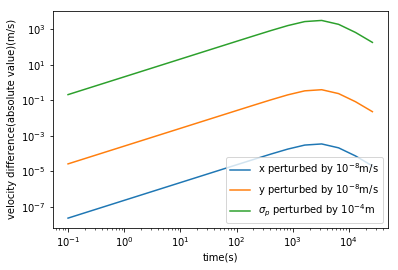

In [133]:
import matplotlib.pyplot as plt
plt.loglog(mytime0,np.abs(vz1[0:18]-vz[0:18]),label='x perturbed by $10^{-8}$m/s')
plt.loglog(mytime0,np.abs(vz2-vz[0:18]),label='y perturbed by $10^{-8}$m/s')
plt.loglog(mytime3,np.abs(vz3-vz[0:18]),label='$\sigma _p$ perturbed by $10^{-4}$m')
plt.xlabel('time(s)')
plt.ylabel('velocity difference(absolute value)(m/s)')
plt.legend()
plt.savefig('pert.png')
#plt.xlim(0,1000)

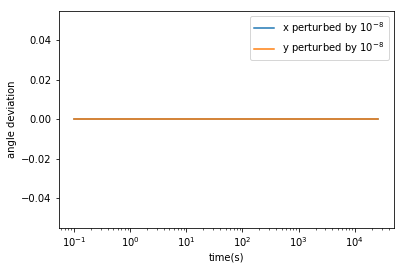

In [121]:
import matplotlib.pyplot as plt
plt.semilogx(mytime0,(vx1/vz1-np.array(vx)/np.array(vz))[0:18],label='x perturbed by $10^{-8}$')
plt.semilogx(mytime0,(vx2/vz2-np.array(vx[0:18])/np.array(vz[0:18]))[0:18],label='y perturbed by $10^{-8}$')

plt.xlabel('time(s)')
plt.ylabel('angle deviation')
plt.legend()
plt.savefig('pertang.png')
#plt.xlim(0,1000)

In [122]:
intpvz=interp1d(mytime0,vz2,'cubic')

In [123]:
intpvx=interp1d(mytime0,vx2,'cubic')

In [124]:
intpvz(819.1)-60860120.670187,intpvx(819.1),intpvx(819.1)/intpvz(819.1)

(-0.20391663908958435, array(0.0), 0.0)

In [83]:
intpvz(819.1),intpvx(819.1)

(array(60860120.670187), array(0.0))